In [1]:
import pandas as pd

In [2]:
#importing dataset
parole = pd.read_csv("F:/kaggle/Datasets/parole.csv")

In [3]:
#Checking first 5 rows
parole.head()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0


In [4]:
parole.shape

(675, 9)

In [5]:
#checking if there are na's in data set. There are none
parole.isnull().sum()

male                 0
race                 0
age                  0
state                0
time.served          0
max.sentence         0
multiple.offenses    0
crime                0
violator             0
dtype: int64

In [28]:
import seaborn as sb
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

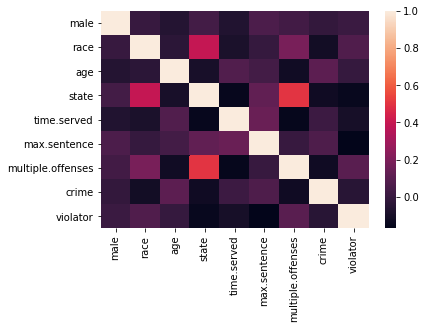

In [8]:
%matplotlib inline
sb.heatmap(parole.corr()) 
#we can see that there is minimum correlation between the predictors. So now we will divide this into train and test

In [13]:
X = parole.ix[:,(0,1,2,3,4,5,6,7)].values
y = parole.ix[:,8].values

In [15]:
X.shape,y.shape

((675, 8), (675,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [22]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = LogReg.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[182,   2],
       [ 16,   3]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95       184
          1       0.60      0.16      0.25        19

avg / total       0.89      0.91      0.89       203

